**Test file**

In [2]:
#imports

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Image with polygon and label**

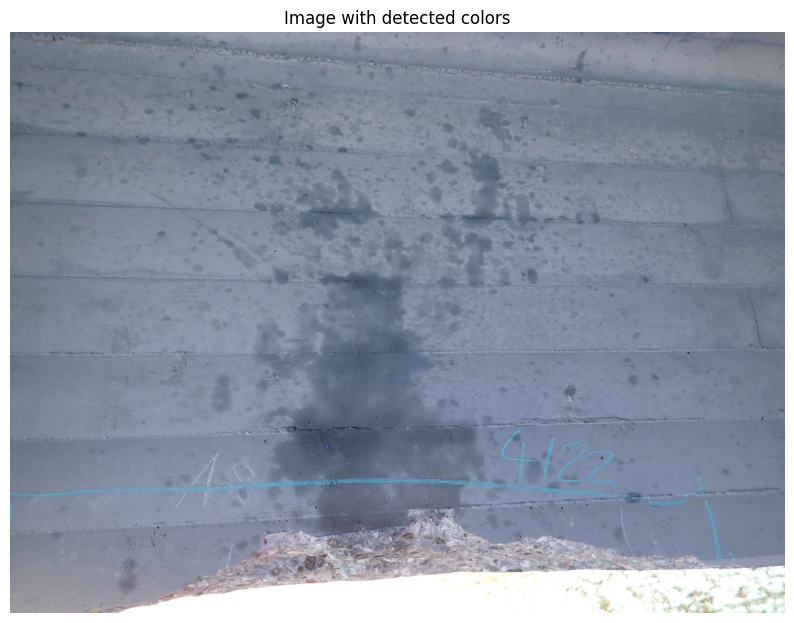

In [3]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0051.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
grey_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Print image:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title("Image with detected colors")
plt.axis('off')
plt.show()

**Create image with overlay polygons**

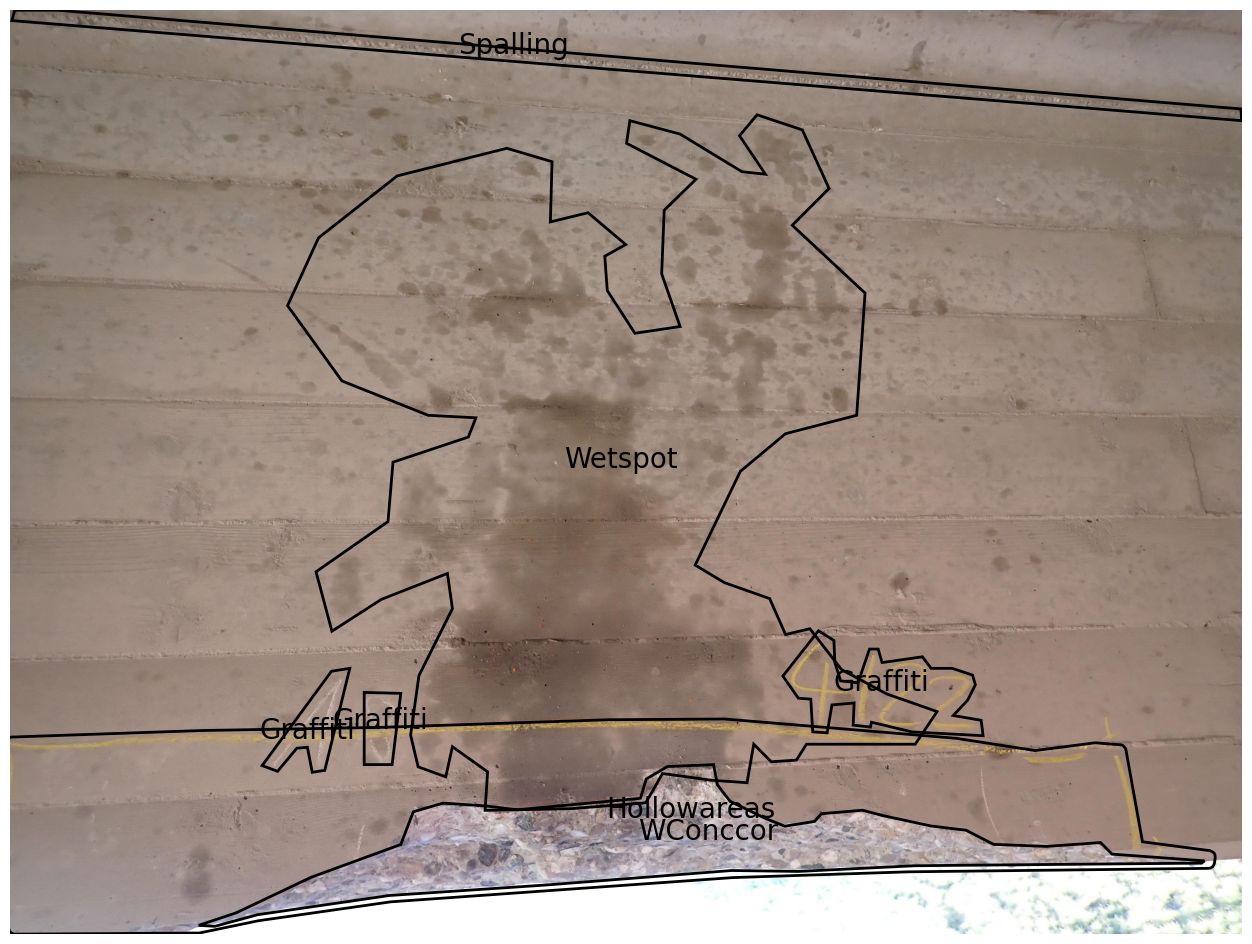

In [4]:
# Imports:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from PIL import Image

# Image number:
image_number_string = "0051"

# Read in image: 
path = "data/dacl10k_v2_devphase/images/train/"
file = f"dacl10k_v2_train_{image_number_string}.jpg"
image_path = path + file
image = Image.open(image_path).convert('RGB')

# Read in corresponding annotations: 
path = "data/dacl10k_v2_devphase/annotations/train/"
file = f"dacl10k_v2_train_{image_number_string}.json"
annotations_path = path + file
with open(annotations_path, 'r') as file:
    annotations = json.load(file)
shapes = annotations["shapes"]

# Draw image with polygons: 
fig, ax = plt.subplots(1, figsize=(20,12))
ax.imshow(image)
for polygon in shapes:
    points = polygon['points']
    label = polygon['label']
    polygon = patches.Polygon(points, closed=True, edgecolor='black', fill=False, linewidth=2, label=label)
    ax.add_patch(polygon)
    centroid_x = sum([point[0] for point in points]) / len(points)
    centroid_y = sum([point[1] for point in points]) / len(points)
    ax.text(centroid_x, centroid_y, label, color='black', fontsize=20, ha='center')
plt.axis('off')
plt.show()



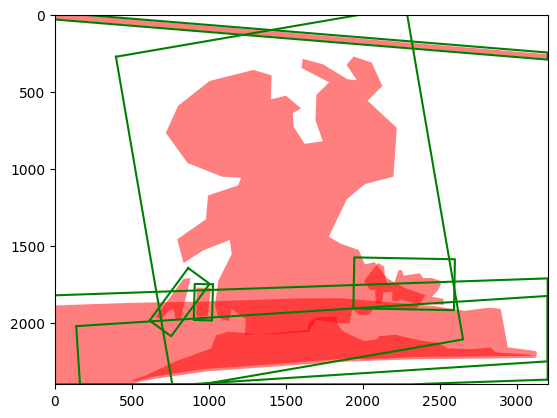

In [6]:
from shapely.geometry import Polygon, box
from shapely.affinity import scale, affine_transform

data = annotations
image_width = data["imageWidth"]
image_height = data["imageHeight"]
image_bounds = box(0, 0, image_width, image_height)
scaling = 1.25

fig, ax = plt.subplots()
ax.set_xlim(0, image_width)
ax.set_ylim(0, image_height)
ax.set_aspect('equal')

for shape in data['shapes']:
    polygon = Polygon(shape['points'])
    min_rect = polygon.minimum_rotated_rectangle
    rect_center = min_rect.centroid
    scaled_rect = scale(min_rect, xfact=scaling, yfact=scaling, origin=rect_center)

    clipped_rect = scaled_rect.intersection(image_bounds)

    # Plotting the polygon
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='r', ec='none')

    # Plotting the minimum area rectangle
    x, y = clipped_rect.exterior.xy
    ax.plot(x, y, 'g')

plt.gca().invert_yaxis()  # Invert Y axis to match image coordinate system
plt.show()

# extract features

In [8]:
image_copy = np.copy(image)

### find darker areas

62
[[array([[1199, 2210]], dtype=int32), array([[1194, 2215]], dtype=int32), array([[1194, 2217]], dtype=int32), array([[1195, 2218]], dtype=int32), array([[1195, 2219]], dtype=int32), array([[1198, 2222]], dtype=int32), array([[1203, 2222]], dtype=int32), array([[1205, 2220]], dtype=int32), array([[1205, 2219]], dtype=int32), array([[1206, 2218]], dtype=int32), array([[1206, 2216]], dtype=int32), array([[1205, 2215]], dtype=int32), array([[1205, 2214]], dtype=int32), array([[1204, 2213]], dtype=int32), array([[1204, 2212]], dtype=int32), array([[1203, 2211]], dtype=int32), array([[1202, 2211]], dtype=int32), array([[1201, 2210]], dtype=int32)], [array([[1229, 2173]], dtype=int32), array([[1227, 2175]], dtype=int32), array([[1227, 2182]], dtype=int32), array([[1230, 2185]], dtype=int32), array([[1231, 2185]], dtype=int32), array([[1232, 2186]], dtype=int32), array([[1233, 2186]], dtype=int32), array([[1234, 2187]], dtype=int32), array([[1235, 2187]], dtype=int32), array([[1237, 2189]],

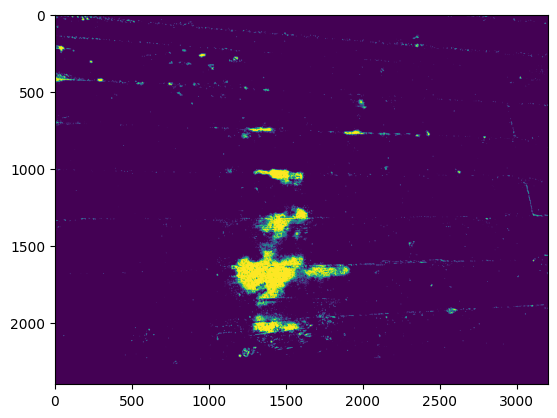

In [17]:
def find_darker_areas(image, threshold=100):
    # Convert image to grayscale:
    grey_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    # Find dark areas:
    dark_areas = grey_image < threshold
    dark_areas = dark_areas.astype(np.uint8)
    blurred = cv2.blur(dark_areas, (15, 15), 0)
    contours, _ = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    polygons = []
    for contour in contours:
        points = []
        for point in contour:
            points.append(point)
        polygons.append(points)

    return dark_areas, polygons

dark_areas, polygons = find_darker_areas(image_copy, threshold=100)

plt.imshow(dark_areas)
print(len(polygons))
print(polygons)

### find reddish brown areas